# Part I. Classification on 20newsgroup Data

In [1]:
#%% import data

import pandas as pd
import numpy as np
import time
from matplotlib import pyplot as plt


P1_DOC = './20newsgroup/documents.txt'
P1_GPNAME = '20newsgroup/groupnames.txt'
P1_GP = './20newsgroup/newsgroups.txt'
P1_WORDLIST = '20newsgroup/wordlist.txt'
doc_df = pd.read_csv('./20newsgroup/documents.txt', header=None, sep='\t')
gp_df = pd.read_csv('./20newsgroup/newsgroups.txt', header=None, sep='\t', names=['gp'])
gp_df['gp'] = gp_df.gp.astype('category')
wd_df = pd.read_csv('20newsgroup/wordlist.txt', header=None, sep='\t', names=['word'])
gpname_df = pd.read_csv('20newsgroup/groupnames.txt', header=None, sep='\t')
NUM_POST = len(gp_df)
NUM_WORD = len(wd_df)
NUM_GP = len(gpname_df)


In [2]:
data = np.zeros((NUM_POST, NUM_WORD), dtype=int)
for idx, row in doc_df.iterrows():
    i,j,n = row
    data[i-1][j-1] = n
data = pd.DataFrame(data)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [3]:
#%% train test
from sklearn.model_selection import train_test_split

p1_train_x, p1_test_x, \
    p1_train_y, p1_test_y = train_test_split(data, gp_df.gp.to_numpy(), 
                                                                test_size=0.3,
                                                                shuffle=True,
                                                                random_state=42)

# 1.1 Random forest

1.1.1 Build a random forest for this dataset and report the 5-fold cross validation value of the misclassification error. Note that you need to train the model by yourself, i.e., how many predictors are chosen in each tree and how many trees are used. There is no benchmark. Stop tuning when you feel appropriate.

max predictors = 10,n trees = 25,cv error = 0.20168936631737877
max predictors = 10,n trees = 50,cv error = 0.19649980788585053
max predictors = 10,n trees = 100,cv error = 0.19412521508852532
max predictors = 25,n trees = 25,cv error = 0.2052078218511756
max predictors = 25,n trees = 50,cv error = 0.20441591687977212
max predictors = 25,n trees = 100,cv error = 0.2015133874348447
max predictors = 50,n trees = 25,cv error = 0.21198088067602505
max predictors = 50,n trees = 50,cv error = 0.20960578486078596
max predictors = 50,n trees = 100,cv error = 0.20784692468390153
           10        25        50
25   0.201689  0.205208  0.211981
50   0.196500  0.204416  0.209606
100  0.194125  0.201513  0.207847


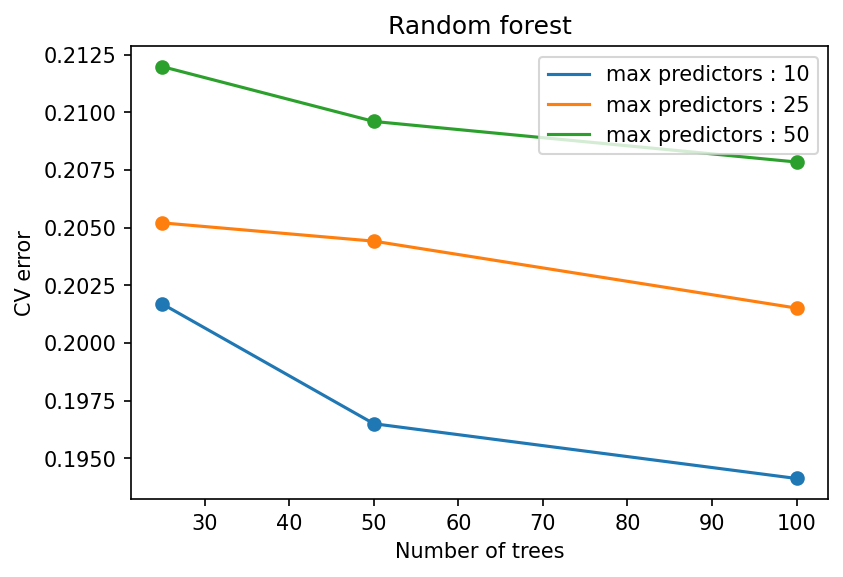

In [4]:
from sklearn.ensemble import RandomForestClassifier
from collections import defaultdict 
from sklearn.model_selection import cross_val_score



rf_cv_errs = defaultdict(lambda: defaultdict(float))
max_predictors = [10, NUM_WORD//4, NUM_WORD//2]  
n_trees = [25, 50, 100]
for max_predictor in max_predictors:
    for n_tree in n_trees:
        rf = RandomForestClassifier(n_estimators = n_tree,  # number of tree
                                   max_features=max_predictor , # mtry in R
                                   bootstrap=True,
                                   random_state = 42)
        cv_err = 1 - (np.mean(cross_val_score(rf, p1_train_x, p1_train_y, cv=5)))
        rf_cv_errs[max_predictor][n_tree] = cv_err
            
        print(f'max predictors = {max_predictor},n trees = {n_tree},cv error = {cv_err}')


rf_cv_errs_df = pd.DataFrame(rf_cv_errs)
print(rf_cv_errs_df)


plt.figure(dpi = 150)
plt.title('Random forest')
for col in rf_cv_errs_df.columns:
    plt.plot(rf_cv_errs_df.index, rf_cv_errs_df[col], label=f'max predictors : {col}')
    plt.scatter(rf_cv_errs_df.index, rf_cv_errs_df[col])
plt.ylabel('CV error')
plt.xlabel('Number of trees')
plt.legend()
plt.show()
        
        
        


From above figure we find that when number of predictors is 10 and number of trees is 100, the model has best CV error.

1.1.2 Report the best CV error, the corresponding confusion matrix and tuning parameters.

In [5]:
best_rf = RandomForestClassifier(n_estimators = 100,  # number of tree
                                   max_features=10, # mtry in R
                                   bootstrap=True,
                                   random_state = 42)
best_rf.fit(p1_train_x, p1_train_y)
p1_rf_test_hat = best_rf.predict(p1_test_x)


from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

print(f"best CV error: {rf_cv_errs_df[10][100]}")
print()

print('confusion matrix')
print(confusion_matrix(p1_test_y ,p1_rf_test_hat))
print()
rf_cmat = confusion_matrix(p1_test_y ,p1_rf_test_hat)

print('accuracy score')
print(accuracy_score(p1_test_y ,p1_rf_test_hat))
print()

print('precision score')
print(precision_score(p1_test_y ,p1_rf_test_hat, average='weighted'))
print()

print('recall score')
print(recall_score(p1_test_y ,p1_rf_test_hat, average='weighted'))
print()

best CV error: 0.19412521508852532

confusion matrix
[[1191   50   81   53]
 [  65  823   50  128]
 [ 172   57  496  113]
 [  68   36   78 1412]]

accuracy score
0.8048430125179561

precision score
0.8027372718632403

recall score
0.8048430125179561



1.1.3 What are the ten most important keywords based on variable importance?

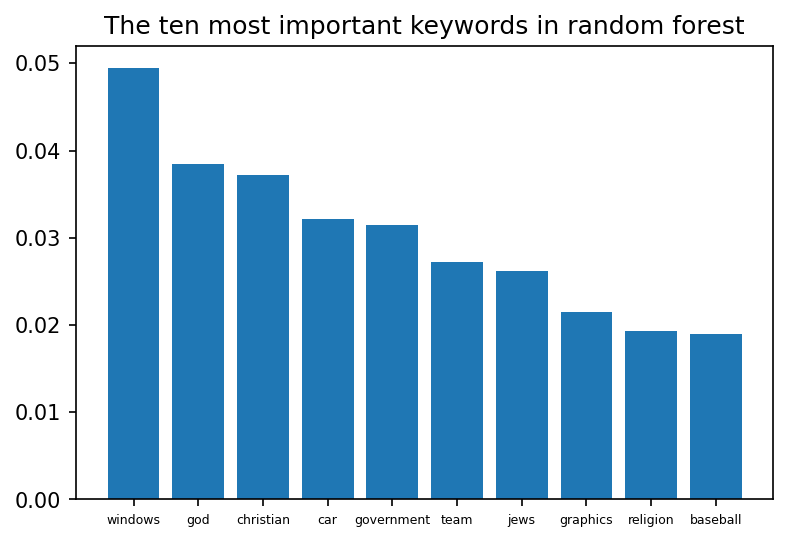

In [6]:
rf_importance_df = wd_df.copy()
rf_importance_df['importance'] = best_rf.feature_importances_
top_rf_importance_df = rf_importance_df.sort_values(by='importance', ascending=False).iloc[:10]

plt.figure(dpi = 150)
plt.title('The ten most important keywords in random forest')
plt.bar(top_rf_importance_df.word, top_rf_importance_df.importance)
plt.xticks(fontsize=6)
plt.show()

# 1.2 boosting tree

1.2.1 Build a boosting tree for this dataset and report the 5-fold cross validation value of the
misclassification error.

max depth = 3, n trees = 25, cv error = 0.24716485560870782
max depth = 3, n trees = 50, cv error = 0.20670371974008683
max depth = 3, n trees = 75, cv error = 0.1959727998867049
max depth = 3, n trees = 100, cv error = 0.18902387826037825
max depth = 5, n trees = 25, cv error = 0.2163790758477495
max depth = 5, n trees = 50, cv error = 0.19034383596044113
max depth = 5, n trees = 75, cv error = 0.18427442180992826
max depth = 5, n trees = 100, cv error = 0.18172342449952628
CV matrix for different parameters:
            3         5
25   0.247165  0.216379
50   0.206704  0.190344
75   0.195973  0.184274
100  0.189024  0.181723


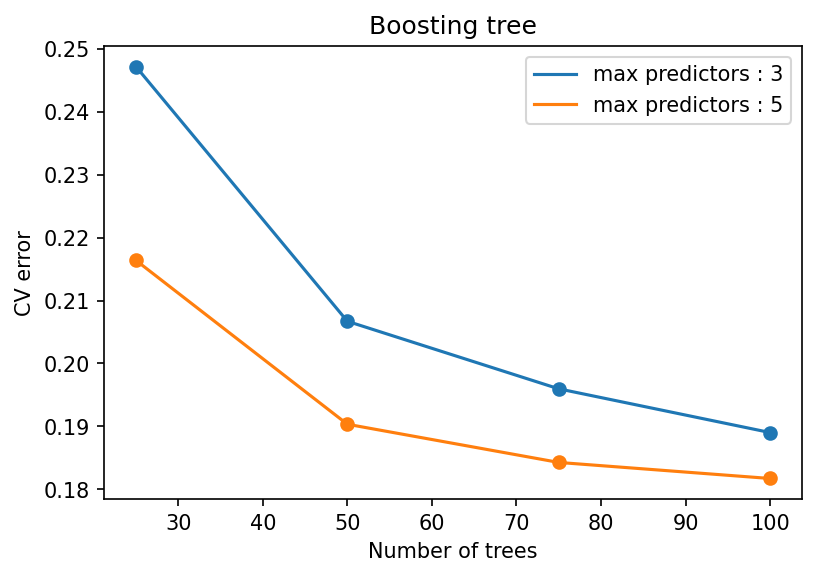

In [7]:
from sklearn.ensemble import GradientBoostingClassifier
gb_cv_errs = defaultdict(lambda: defaultdict(float))

max_depths = [3, 5]
n_trees = [25, 50, 75, 100]
for max_depth in max_depths:
    for n_tree in n_trees:
        gbc = GradientBoostingClassifier(n_estimators = n_tree,  # number of tree
                                   max_depth=max_depth, # depth of tree
                                   random_state = 42)
        
        cv_err = 1 - (np.mean(cross_val_score(gbc, p1_train_x, p1_train_y, cv=5, n_jobs=4)))
        gb_cv_errs[max_depth][n_tree] = cv_err
        print(f'max depth = {max_depth}, n trees = {n_tree}, cv error = {cv_err}')

gb_cv_errs_df = pd.DataFrame(gb_cv_errs)
print("CV matrix for different parameters:")
print(gb_cv_errs_df)



plt.figure(dpi = 150)
plt.title('Boosting tree')
for col in gb_cv_errs_df.columns:
    plt.plot(gb_cv_errs_df.index, gb_cv_errs_df[col], label=f'max predictors : {col}')
    plt.scatter(gb_cv_errs_df.index, gb_cv_errs_df[col])
plt.legend()
plt.ylabel('CV error')
plt.xlabel('Number of trees')
plt.show()

1.2.2 report the best CV error, the corresponding confusion matrix and tuning parameters.

From above figure we find that when the depth of tree is 5 and number of trees is 100, the model has best CV error.

In [8]:
best_gbc = GradientBoostingClassifier(n_estimators = 100,  # number of tree
                                   max_depth=5,  # depth of tree
                                   random_state = 42)

best_gbc.fit(p1_train_x, p1_train_y)
p1_gbc_test_hat = best_rf.predict(p1_test_x)


from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score


print(f"best CV error: {gb_cv_errs_df[5][100]}")
print()

print('confusion matrix')
print(confusion_matrix(p1_test_y ,p1_gbc_test_hat))
print()
gb_cmat = confusion_matrix(p1_test_y ,p1_gbc_test_hat)


print('accuracy score')
print(accuracy_score(p1_test_y ,p1_gbc_test_hat))
print()

print('precision score')
print(precision_score(p1_test_y ,p1_gbc_test_hat, average='weighted'))
print()

print('recall score')
print(recall_score(p1_test_y ,p1_gbc_test_hat, average='weighted'))
print()

best CV error: 0.18172342449952628

confusion matrix
[[1191   50   81   53]
 [  65  823   50  128]
 [ 172   57  496  113]
 [  68   36   78 1412]]

accuracy score
0.8048430125179561

precision score
0.8027372718632403

recall score
0.8048430125179561



1.2.3 What are the ten most important keywords based on variable importance?

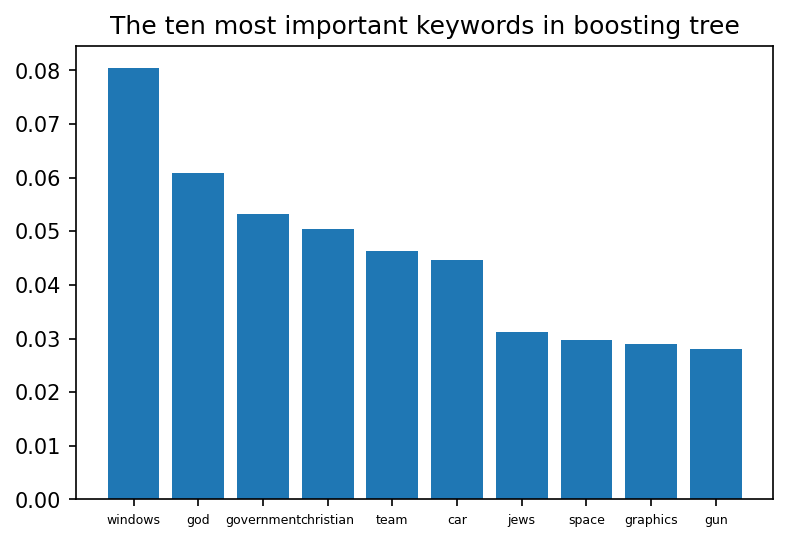

In [9]:
gb_importance_df = wd_df.copy()
gb_importance_df['importance'] = best_gbc.feature_importances_
top_gb_importance_df = gb_importance_df.sort_values(by='importance', ascending=False).iloc[:10]

plt.figure(dpi = 150)
plt.title('The ten most important keywords in boosting tree')
_ = plt.bar(top_gb_importance_df.word, top_gb_importance_df.importance)
plt.xticks(fontsize=6)
plt.show()

# 1.3 Compare the results from random forest and boosting trees

[[0.13381818 0.13381818]
 [0.22795497 0.22795497]
 [0.40811456 0.40811456]
 [0.11417817 0.11417817]]


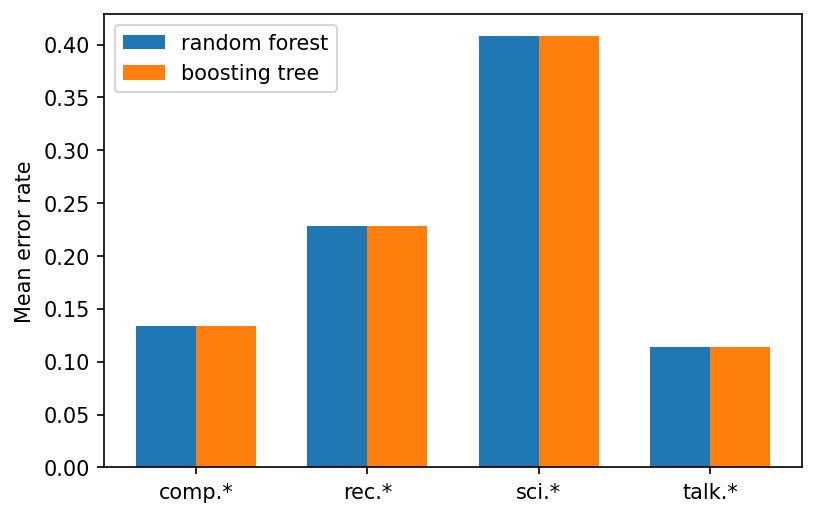

Mean error of random forest: 0.22101647006965894
Mean error of boosting tree: 0.22101647006965894


In [10]:
errors_per_class = np.zeros((NUM_GP, 2))

gb_cmat = confusion_matrix(p1_test_y ,p1_gbc_test_hat)
rf_cmat = confusion_matrix(p1_test_y ,p1_rf_test_hat)

for clz_idx in range(NUM_GP):
    errors_per_class[clz_idx][0] = 1 - (rf_cmat[clz_idx][clz_idx]/np.sum(rf_cmat[clz_idx]))
    errors_per_class[clz_idx][1] = 1 - (gb_cmat[clz_idx][clz_idx]/np.sum(gb_cmat[clz_idx]))
print(errors_per_class)

x = np.arange(NUM_GP)
width = 0.35
fig, ax = plt.subplots(dpi = 150)
rects1 = ax.bar(x - width/2, errors_per_class[:,0], width, label='random forest')
rects2 = ax.bar(x + width/2, errors_per_class[:,1], width, label='boosting tree')
ax.set_xticks(x)
ax.set_xticklabels(gpname_df[0].to_list())
ax.legend()
plt.ylabel('Mean error rate')
plt.show()
print(f"Mean error of random forest: {np.mean(errors_per_class[:,0])}")
print(f"Mean error of boosting tree: {np.mean(errors_per_class[:,1])}")

The best model of random forest and boosting tree have the exactly same confusion matrix, which leads to the same performance.

# 1.4 LDA

Build a multi-class LDA classifier. Report the 5-fold CV error of misclassification and the confusionmatrix.

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(solver='svd')  
lda.fit(p1_train_x, p1_train_y)
lda_cv_err = 1 - (np.mean(cross_val_score(lda, p1_train_x, p1_train_y, cv=5)))
print(f'LDA - cv error of training set: {lda_cv_err}')

LDA - cv error of training set: 0.2026578305766018


In [12]:
p1_lda_test_hat = lda.predict(p1_test_x)

print('confusion matrix')
print(confusion_matrix(p1_test_y ,p1_lda_test_hat))
print()

print('accuracy score')
print(accuracy_score(p1_test_y ,p1_lda_test_hat))
print()

print('precision score')
print(precision_score(p1_test_y ,p1_lda_test_hat, average='weighted'))
print()

print('recall score')
print(recall_score(p1_test_y ,p1_lda_test_hat, average='weighted'))
print()

confusion matrix
[[1228    8   67   72]
 [  99  765   52  150]
 [ 182   40  486  130]
 [  73   26   95 1400]]

accuracy score
0.7960188795403242

precision score
0.7992723404453382

recall score
0.7960188795403242



# 1.5 QDA

In [13]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda_cv_err = 1 - (np.mean(cross_val_score(qda, p1_train_x, p1_train_y, cv=5)))
print(f'QDA - cv error of training set: {qda_cv_err}')

C:\Users\Grain\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Grain\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Grain\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\Grain\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QDA - cv error of training set: 0.3000271242736712


C:\Users\Grain\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [14]:
qda.fit(p1_train_x, p1_train_y)
p1_qda_test_hat = qda.predict(p1_test_x)

print('confusion matrix')
print(confusion_matrix(p1_test_y ,p1_qda_test_hat))
print()

print('accuracy score')
print(accuracy_score(p1_test_y ,p1_qda_test_hat))
print()

print('precision score')
print(precision_score(p1_test_y ,p1_qda_test_hat, average='weighted'))
print()

print('recall score')
print(recall_score(p1_test_y ,p1_qda_test_hat, average='weighted'))
print()

C:\Users\Grain\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


confusion matrix
[[1305   33   25   12]
 [ 225  817    8   16]
 [ 382   78  319   59]
 [ 289  248   29 1028]]

accuracy score
0.7118817976605787

precision score
0.7648454791333481

recall score
0.7118817976605787



# 1.6 Comparison

[[0.13381818 0.13381818 0.10690909 0.05090909]
 [0.22795497 0.22795497 0.28236398 0.23358349]
 [0.40811456 0.40811456 0.42004773 0.61933174]
 [0.11417817 0.11417817 0.1217064  0.35508156]]


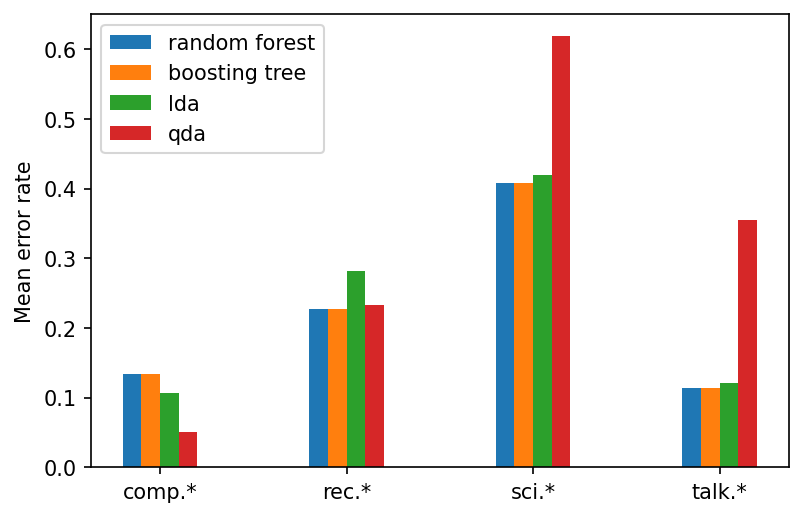

In [15]:
all_errors_per_class = np.concatenate((errors_per_class, np.zeros((NUM_GP,2))), axis=1)
lda_cmat = confusion_matrix(p1_test_y ,p1_lda_test_hat)
qda_cmat = confusion_matrix(p1_test_y ,p1_qda_test_hat)

for clz_idx in range(NUM_GP):
    all_errors_per_class[clz_idx][2] = 1 - (lda_cmat[clz_idx][clz_idx]/np.sum(lda_cmat[clz_idx]))
    all_errors_per_class[clz_idx][3] = 1 - (qda_cmat[clz_idx][clz_idx]/np.sum(qda_cmat[clz_idx]))
print(all_errors_per_class)

x = np.arange(NUM_GP)
width = 0.35
fig, ax = plt.subplots(dpi = 150)
_ = ax.bar(x - 0.15, all_errors_per_class[:,0], 0.1, label='random forest')
_ = ax.bar(x - 0.05, all_errors_per_class[:,1], 0.1, label='boosting tree')
_ = ax.bar(x + 0.05, all_errors_per_class[:,2], 0.1, label='lda')
_ = ax.bar(x + 0.15, all_errors_per_class[:,3], 0.1, label='qda')

ax.set_xticks(x)
ax.set_xticklabels(gpname_df[0].to_list())
ax.legend()
plt.ylabel('Mean error rate')
plt.show()

From the above figure, we draw a conclusion that random forest and boosting tress have better performance in the mean error rate.

# Part II. Spectral Clustering (PCA + K-means)on 20newsgroup Data

2.1 Apply PCA on the binary occurrence matrix and apply K-means clustering. Basically, take the top 4 left singular vectors of the occurrence matrix (of size 16242x100) and apply K-means on the rows of these singular vectors with K=4. 

group to color map: {1: 'r', 2: 'b', 3: 'g', 4: 'c'}


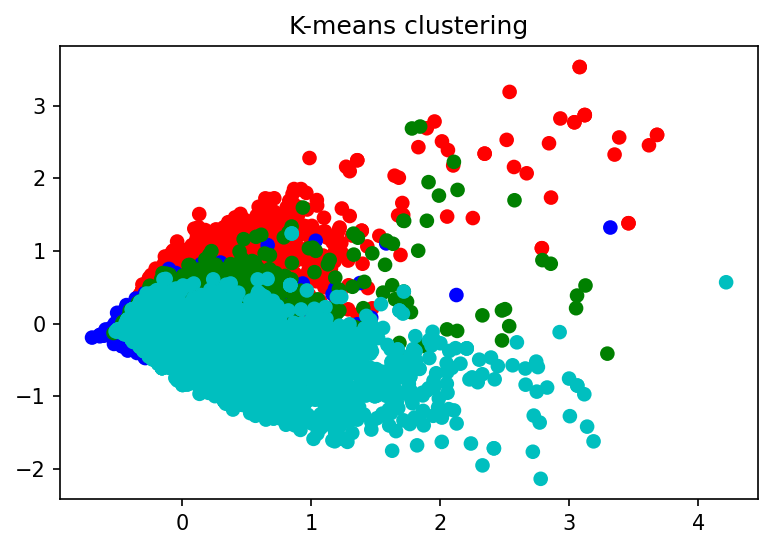

In [16]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

p2_x, p2_y = data, gp_df.gp.to_numpy()

pca4 = PCA(n_components=4)
pca4.fit(p2_x)
p2_x_pca4 = pd.DataFrame(pca4.transform(p2_x))

colors = ['r', 'b', 'g', 'c']
km_colors = [colors[label-1] for label in p2_y]

plt.figure(dpi = 150)    
plt.title('K-means clustering')
plt.scatter(p2_x_pca4.iloc[:,0], p2_x_pca4.iloc[:,1], c=km_colors)
print(f"group to color map: {dict(zip(range(1,5), colors))}")
plt.show()

2.1.2 apply K-means on the rows of these singular vectors with K=4. Report the mis-clustering error rate.Report the mis-clustering error rate.

group to color map: {1: 'r', 2: 'b', 3: 'g', 4: 'c'}


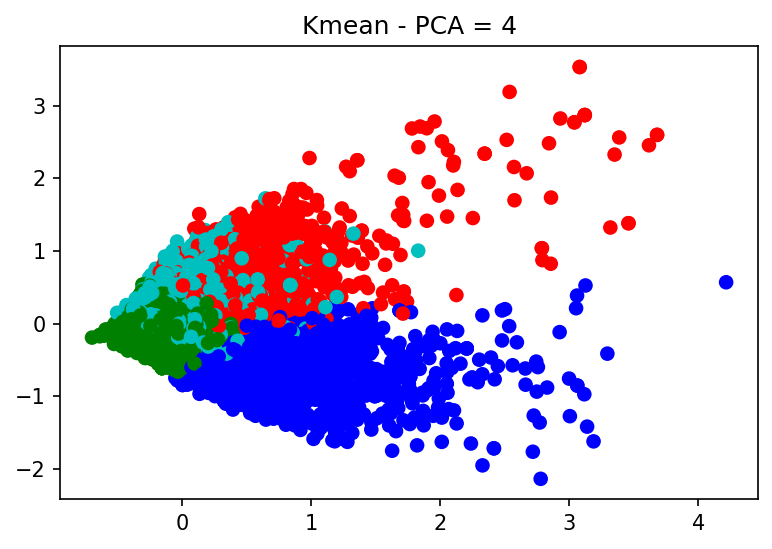

The mis-clustering error rate of Kmean with PCA 4: 0.590876


In [17]:
kmeans_4 = KMeans(n_clusters=4, random_state=42)
kmeans_4.fit(p2_x_pca4)

colors = ['r', 'b', 'g', 'c']
km_colors = [colors[label-1] for label in kmeans_4.labels_]

plt.figure(dpi = 150)    
plt.title('K-means clustering')
plt.scatter(p2_x_pca4.iloc[:,0], p2_x_pca4.iloc[:,1], c=km_colors)
print(f"group to color map: {dict(zip(range(1,5), colors))}")
plt.title('Kmean - PCA = 4')
plt.show()


from itertools import permutations
def find_hamming_error(pred):
    miss_class_errors = []
    for i in permutations(range(4), 4):
        label_map = dict(zip(range(4), i))
        remap_label = np.vectorize(label_map.get)(pred)
        miss_class_errors.append( 1 - (np.sum((p2_y-1) == remap_label)/len(p2_y-1)))
    return min(miss_class_errors)

pca4_miss_error = find_hamming_error(kmeans_4.labels_)
print(f"The mis-clustering error rate of Kmean with PCA 4: {pca4_miss_error:.6f}")

group to color map: {1: 'r', 2: 'b', 3: 'g', 4: 'c'}


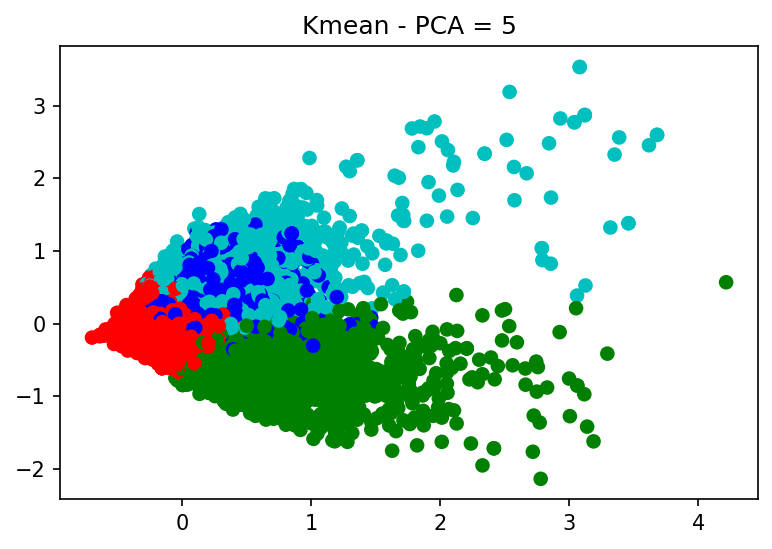

In [18]:
pca5 = PCA(n_components=5)
pca5.fit(p1_train_x)
p2_x_pca5 = pd.DataFrame(pca5.transform(p2_x)) 

kmeans_4_pca5 = KMeans(4)
kmeans_4_pca5.fit(p2_x_pca5)


colors = ['r', 'b', 'g', 'c']
km_colors = [colors[label-1] for label in kmeans_4_pca5.labels_]

plt.figure(dpi = 150)    
plt.title('Kmean - PCA = 5')
plt.scatter(p2_x_pca4.iloc[:,0], p2_x_pca4.iloc[:,1], c=km_colors)
print(f"group to color map: {dict(zip(range(1,5), colors))}")
plt.show()

In [19]:
pca4_miss_error = find_hamming_error(kmeans_4_pca5.labels_)
print(f"The mis-clustering error rate of Kmean with PCA 5: {pca4_miss_error:.6f}")

The mis-clustering error rate of Kmean with PCA 5: 0.588043


2.6 Compare the performances of all above methods and give your comments.

From the mis-clustering error rate, we think that performance of clustering in general is worse than part 1. 
As it can be seen in above figures, the four parts overlap greatly, which is not suitable for clustering method.